In [2]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from PIL import Image
from sklearn.metrics import f1_score
import tensorflow as tf
import datetime
from ml_utils.data_ext  import create_new_road_data

%load_ext autoreload
%autoreload 2
    
import ml_utils.road_seg as rs
import ml_utils.model as model
from ml_utils.canny_layer import add_canny_layer_imgs

print(tf.__version__)

1.4.0


# 1. Loading and Preprocessing

Load raw images and ground truth

In [10]:
### Create new 400 images (roated, mirrored, flipped) in th other folder from original data:
### AUGMENTED DATA GENERATION HERE 
create_new_road_data(400,'data/training/groundtruth', 'data/training/images' )

Processing satImage_084.png:   1%|          | 4/400 [00:00<00:14, 26.43 Samples/s]

Initialised with 100 image(s) found.
Output directory set to data/training/images/output.

Processing satImage_092.png:   3%|▎         | 12/400 [00:00<00:05, 72.15 Samples/s] 

Initialised with 100 image(s) found.
Output directory set to data/training/groundtruth/output.

Renaming groundtruth_24ee37f2-0d75-4919-8055-d4c44ffd0aa7.JPEG to satImage_001.png
Renaming groundtruth_56ebb5b5-b369-4678-b613-177ed9174444.JPEG to satImage_002.png
Renaming groundtruth_d85cbaf1-58d2-407c-ac98-3375ca24529d.JPEG to satImage_003.png
Renaming groundtruth_8deae334-c932-4db1-9857-c3a7da0de1c0.JPEG to satImage_004.png
Renaming groundtruth_b2a94c96-d7ac-46b5-b1b2-0e5cb19dbdae.JPEG to satImage_005.png
Renaming groundtruth_7449ce65-f9ea-46b7-9080-72471ef6ab32.JPEG to satImage_006.png
Renaming groundtruth_cd5046e5-3628-4ce6-a604-3a916f7d5f74.JPEG to satImage_007.png
Renaming groundtruth_4a803ed4-9fba-47e4-815a-4c2d51dc9994.JPEG to satImage_008.png
Renaming groundtruth_786e8788-481d-419e-94c6-eecc815cdadb.JPEG to satImage_009.png
Renaming groundtruth_3068a589-e86a-4184-9987-a346874f3b57.JPEG to satImage_010.png
Renaming groundtruth_faf75fea-eea9-4397-9345-a87601d8e71a.JPEG to satImage_011.png
Renaming groundtruth_b8953ae2-67e6-41a3-8e25-da9f73ab4875.JPEG to satImage_012.png
Rena

Renaming groundtruth_0a61ac3b-c9e1-4de1-bbc4-43a83e15a702.JPEG to satImage_100.png
Renaming groundtruth_22351956-ba0e-43b1-bbfd-d7d0ae57f490.JPEG to satImage_101.png
Renaming groundtruth_518f83b7-c0ad-441a-a313-bafff0ebbac6.JPEG to satImage_102.png
Renaming groundtruth_7e108e30-80b9-4a2c-b08f-7b4ffcf08473.JPEG to satImage_103.png
Renaming groundtruth_2dd3bf17-6620-45ea-99c9-e98236c02fc0.JPEG to satImage_104.png
Renaming groundtruth_489ea0d4-d395-4c50-8a82-f686b224443d.JPEG to satImage_105.png
Renaming groundtruth_f830813a-a6ac-4b40-a344-3743acd0ae1b.JPEG to satImage_106.png
Renaming groundtruth_58c48c2f-bef5-4fbe-bd11-a941264666a8.JPEG to satImage_107.png
Renaming groundtruth_f5012205-b000-453b-875d-1d1cdaada4ac.JPEG to satImage_108.png
Renaming groundtruth_af736d48-31ba-477d-9a49-790820a3ebc3.JPEG to satImage_109.png
Renaming groundtruth_27178800-e281-4045-9667-7db14c4abfeb.JPEG to satImage_110.png
Renaming groundtruth_210b0235-c195-4c54-a511-36653db38456.JPEG to satImage_111.png
Rena

Renaming groundtruth_d3a3243c-e780-4f90-abab-4343989df3cf.JPEG to satImage_199.png
Renaming groundtruth_112ba439-7a80-4557-a5de-f4087a50027d.JPEG to satImage_200.png
Renaming groundtruth_74dbee07-1559-476e-9b80-67164d6b2218.JPEG to satImage_201.png
Renaming groundtruth_ae260534-3bc3-4450-8e41-fd7c585466ba.JPEG to satImage_202.png
Renaming groundtruth_673a33f3-e994-4fdf-808e-90d33d71088f.JPEG to satImage_203.png
Renaming groundtruth_c337fb4f-b498-4ea5-86fe-f46fb2c75023.JPEG to satImage_204.png
Renaming groundtruth_fbbb34cd-b9d3-4dc1-a034-f2c4d9544edb.JPEG to satImage_205.png
Renaming groundtruth_dbc2485d-bff0-45d1-ac2a-a738299828ba.JPEG to satImage_206.png
Renaming groundtruth_b4cc0292-5fb3-4b9a-bd5d-c22904bb7595.JPEG to satImage_207.png
Renaming groundtruth_0632983a-94a5-46f4-8b2d-5acbade7bc79.JPEG to satImage_208.png
Renaming groundtruth_dc7cbb22-c735-4c35-94dc-261c1d0bcb83.JPEG to satImage_209.png
Renaming groundtruth_f4a2e349-d089-464d-8927-1d56f113f693.JPEG to satImage_210.png
Rena

Renaming groundtruth_25e87a2c-ce17-4259-95ff-97efa7828f5f.JPEG to satImage_306.png
Renaming groundtruth_8a78a161-176b-4a74-acda-7330ff1d1323.JPEG to satImage_307.png
Renaming groundtruth_0297714f-2e58-4535-acd0-e4bea010eb41.JPEG to satImage_308.png
Renaming groundtruth_cd5c523d-662f-4708-a1bd-033099ba7772.JPEG to satImage_309.png
Renaming groundtruth_9e94e784-09ca-445d-912b-793dc7226c77.JPEG to satImage_310.png
Renaming groundtruth_055cf283-7f8b-40e9-b0b2-25be9a76d8e3.JPEG to satImage_311.png
Renaming groundtruth_b5dc175f-10b2-40c9-b3ad-fdc180a612d9.JPEG to satImage_312.png
Renaming groundtruth_35962ec6-4320-4c09-9165-d4670e67ae88.JPEG to satImage_313.png
Renaming groundtruth_21f93ffe-2b8a-421a-8ea9-b527d766df3b.JPEG to satImage_314.png
Renaming groundtruth_8d98223a-b7b0-44a8-8f52-d15c720746aa.JPEG to satImage_315.png
Renaming groundtruth_4807ee8d-599b-4475-9cca-840dcc3c46b2.JPEG to satImage_316.png
Renaming groundtruth_f1953aa7-d286-4c70-8922-5da5ccb1a247.JPEG to satImage_317.png
Rena

Renaming images_68cc25c2-f2c3-485e-b582-710e74df7f4c.JPEG to satImage_007.png
Renaming images_66a57ba7-0f12-4ebc-a9a6-4694033af454.JPEG to satImage_008.png
Renaming images_62dadd2d-2546-4a99-be64-3e1ba3290a5c.JPEG to satImage_009.png
Renaming images_1d034f53-c1bd-4f46-8c50-30c74b79ab09.JPEG to satImage_010.png
Renaming images_0ed2783a-1ebe-4177-95ed-14e09e827946.JPEG to satImage_011.png
Renaming images_6dcb8f36-8faa-4128-a38b-5187033af784.JPEG to satImage_012.png
Renaming images_7aafffe9-a242-47bd-a3ba-7136388e64e1.JPEG to satImage_013.png
Renaming images_5d265a60-8b49-4a75-8b35-47680e062d03.JPEG to satImage_014.png
Renaming images_e6ed6ee3-e227-4ed0-8c05-201a7f122728.JPEG to satImage_015.png
Renaming images_a3384950-9a66-4ab3-be2f-c3c366ca27f1.JPEG to satImage_016.png
Renaming images_30fa80b9-a841-4057-822a-884fa3480ef9.JPEG to satImage_017.png
Renaming images_99678253-f00a-4c1f-9e52-da7bed708b3c.JPEG to satImage_018.png
Renaming images_aff1a895-eb93-493b-86ad-3ddaf6b49540.JPEG to sat

Renaming images_99682949-ef4c-4e7f-b397-b67c8c4a7a2b.JPEG to satImage_114.png
Renaming images_7064ce2d-3635-4433-8b1d-c8b8508c204f.JPEG to satImage_115.png
Renaming images_e017a507-4ce4-40e0-ada8-3a3d07ca9c4b.JPEG to satImage_116.png
Renaming images_7299bb83-54db-46b7-9ef2-ee4786b58226.JPEG to satImage_117.png
Renaming images_af92f3b4-b48a-4913-911e-b4f293810218.JPEG to satImage_118.png
Renaming images_19644509-62e1-4a50-b53e-4d8917fde7ee.JPEG to satImage_119.png
Renaming images_8abe4a20-51b7-4847-a904-51c9e3445bab.JPEG to satImage_120.png
Renaming images_b05dd6ad-dc75-44f6-8279-5abf2ac3c389.JPEG to satImage_121.png
Renaming images_79262db8-c008-42a1-bbe4-f095a5656518.JPEG to satImage_122.png
Renaming images_a245d5af-a969-45d5-b32a-602ef287ade2.JPEG to satImage_123.png
Renaming images_a92284db-cf3a-4b0a-84d1-338aad939646.JPEG to satImage_124.png
Renaming images_7bcad5d5-11d8-478a-bdde-66f1ac946dd9.JPEG to satImage_125.png
Renaming images_7f22fbf5-4dc4-4400-8e29-cc089b3dcefb.JPEG to sat

Renaming images_96a7d515-4ec6-40c9-9bfd-4af28ce75e4e.JPEG to satImage_223.png
Renaming images_ba04d8ce-b17b-457c-9f54-5160080be778.JPEG to satImage_224.png
Renaming images_249d271c-5372-41d7-a3e5-5d52a08cbe7a.JPEG to satImage_225.png
Renaming images_bb902e7b-0933-4ec5-98aa-d1f87d29fd8d.JPEG to satImage_226.png
Renaming images_e5eb2c5c-7a29-4032-ae95-867261d1911b.JPEG to satImage_227.png
Renaming images_147a2962-c019-474c-aa72-b0696286a4b2.JPEG to satImage_228.png
Renaming images_efc6ba7a-fadd-49af-94dd-cb2815d183f1.JPEG to satImage_229.png
Renaming images_a0278d80-cbd9-40c4-a107-dd7b8ed21535.JPEG to satImage_230.png
Renaming images_285745ed-ea0f-4d34-a63b-27d493e4f4ca.JPEG to satImage_231.png
Renaming images_416eb7f4-8254-4d17-bfb9-ada8863bef2e.JPEG to satImage_232.png
Renaming images_507c63a8-1c15-483e-af57-fb7f7a8d9b7d.JPEG to satImage_233.png
Renaming images_4dcecbc0-e5f0-4f39-9da9-d46b3e40a118.JPEG to satImage_234.png
Renaming images_4514aed8-680c-4c48-8ebe-348f711fd72f.JPEG to sat

Renaming images_17ea0987-4e9e-4454-aedf-37b74c639f3a.JPEG to satImage_330.png
Renaming images_855f4238-ba62-4c19-9909-9e3943d33e92.JPEG to satImage_331.png
Renaming images_78f7f204-4757-465c-aee9-d2578e76ba75.JPEG to satImage_332.png
Renaming images_433b1b98-f411-4fa4-83f5-6915f5ad280d.JPEG to satImage_333.png
Renaming images_c66cad33-ac99-437b-8124-1f8d1e1d37ed.JPEG to satImage_334.png
Renaming images_be480f4f-c650-449c-a694-a20442764672.JPEG to satImage_335.png
Renaming images_ed4c5e58-767a-4d38-ac0d-482e74369d53.JPEG to satImage_336.png
Renaming images_8bf64c9b-a60c-468f-b2c5-cfaa99dd9f3a.JPEG to satImage_337.png
Renaming images_7f4bfec8-af48-402c-876e-57a87fc008ab.JPEG to satImage_338.png
Renaming images_23318e41-4c3b-4215-9ab7-3e1c760b38b7.JPEG to satImage_339.png
Renaming images_e2253245-0130-44a6-80f4-1c0115c48ea3.JPEG to satImage_340.png
Renaming images_0e8f896d-a6c8-4c3e-a196-3d6a3ae38a93.JPEG to satImage_341.png
Renaming images_6ecbb502-15e4-48ee-b527-f1a9a985b79d.JPEG to sat

In [12]:
path_data = 'data'
path_train_dir = os.path.join(path_data, 'training')
path_test = os.path.join(path_data, 'test_set_images')
path_models = 'model'

if not os.path.exists(path_models):
    os.mkdir(path_models)
#train_imgs, train_gt, val_imgs, val_gt, id_train, id_valid = rs.load_train_set(path_train_dir, ratio=0.8)

# uncomment the line above not to use augmented data
train_imgs, train_gt, val_imgs, val_gt, id_train, id_valid = rs.load_train_set(path_train_dir,
                                                                               use_augmented=True, 
                                                                               ratio=0.8)
## IDK when using augmentation it reads the mask image as RGB
train_gt = train_gt.mean(axis=3)
                                                                               
val_gt = val_gt.mean(axis=3) 
                                                                               

In [14]:
print(train_gt.shape)
print(val_gt.shape)

(320, 400, 400)
(80, 400, 400)


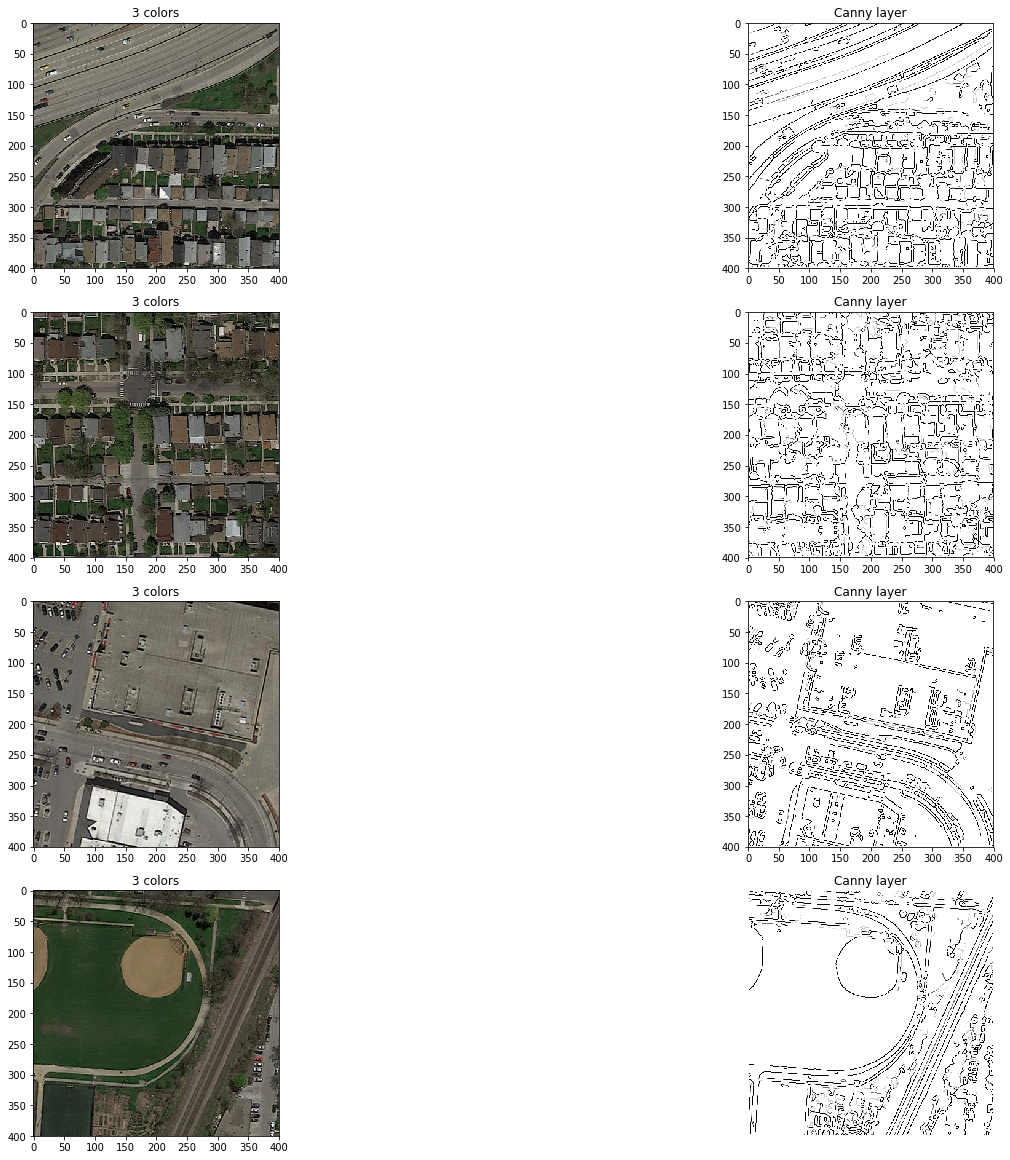

In [15]:
train_imgs_added_canny = add_canny_layer_imgs(train_imgs, sigma=1.5,plot_random=True, nr_plot_imgs=3) 
val_imgs_added_canny = add_canny_layer_imgs(val_imgs, sigma=1.5) 

train_imgs_norm, mean_train, std_train = rs.normalize_data(train_imgs_added_canny, mode='all')
val_imgs_norm, _, _ = rs.normalize_data(val_imgs_added_canny, mode='all', mean_ref=mean_train, std_ref=std_train)

Generate smaller images for training

In [16]:
patch_size = 80
patch_tr, lab_tr,_ = rs.get_patches_all(train_imgs_norm, train_gt, patch_size)
patch_val, lab_val,_ = rs.get_patches_all(val_imgs_norm, val_gt, patch_size)

print('Shapes train: {},  test: {}'.format(patch_tr.shape, patch_val.shape))

Shapes train: (8000, 80, 80, 4),  test: (2000, 80, 80, 4)


Take only part of train and validation set (should at least contain a part of the road)

In [73]:
useful_patches_tr, useful_lab_tr = rs.get_useful_patches(patch_tr, lab_tr, 0.2, 0.7)
useful_patches_val, useful_lab_val = rs.get_useful_patches(patch_val, lab_val, 0.2, 0.7)
useful_lab_tr = useful_lab_tr.astype(int)
useful_lab_val = useful_lab_val.astype(int)

print('Shapes train: {},  test: {}'.format(useful_patches_tr.shape, useful_patches_val.shape))

999 / 8000
1999 / 8000
2999 / 8000
3999 / 8000
4999 / 8000
5999 / 8000
6999 / 8000
7999 / 8000
999 / 2000
1999 / 2000
Shapes train: (3062, 80, 80, 4),  test: (761, 80, 80, 4)


# 2. Model training

Display patches example with label ground truth

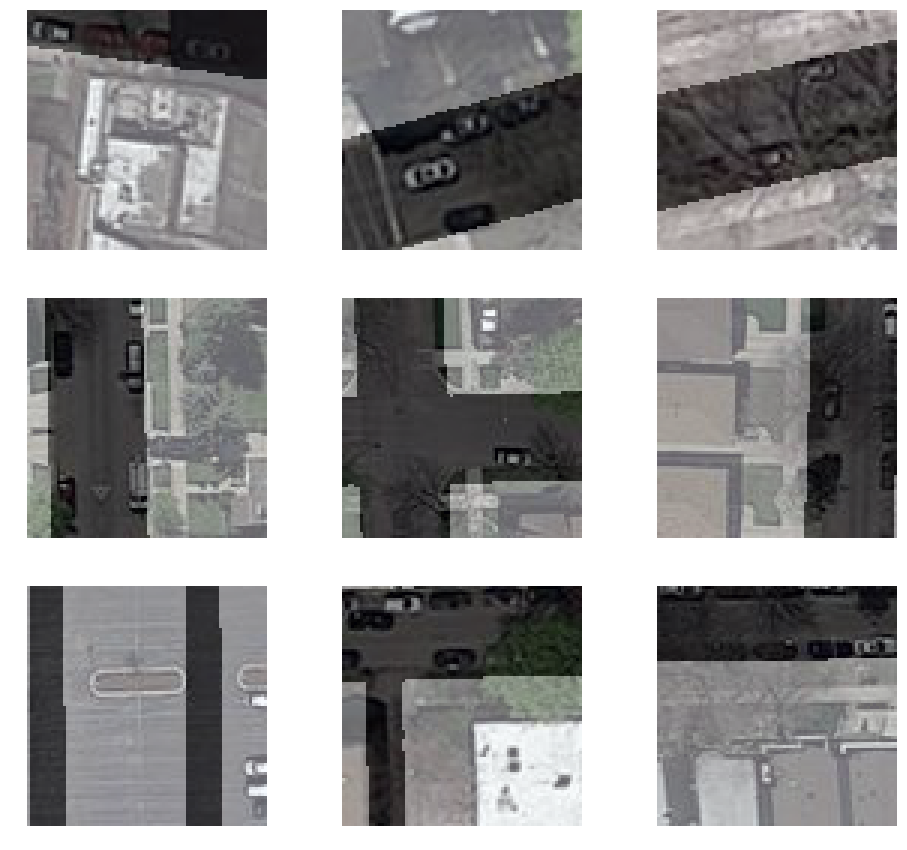

In [77]:
n_display = 9
id_display = np.random.permutation(len(useful_patches_tr))[:n_display]

plt.figure(figsize=(16, 5*(n_display//3)))
for i, id_ in enumerate(id_display):
    plt.subplot(n_display//3,3,i+1)
    # dont show the canny
    img = useful_patches_tr[id_,:,:,:3]
    plt.imshow( ( img - np.min(img) ) / np.max(img - np.min(img)) ); 
    plt.imshow(useful_lab_tr[id_], alpha=0.4); 
    plt.axis('off');
plt.show()

In [78]:
import ml_utils.model as model

m = model.Model()
m.train_model(useful_patches_tr, useful_lab_tr, train_imgs_norm, train_gt, val_imgs_norm, val_gt, n_epoch=100)
name_model = m.save_path


conv1 size (?, ?, ?, 64)
pool1 size (?, ?, ?, 64)
conv2 size (?, ?, ?, 128)
pool2 size (?, ?, ?, 128)
conv3 size (?, ?, ?, 256)
pool3 size (?, ?, ?, 256)
conv4 size (?, ?, ?, 256)
pool4 size (?, ?, ?, 256)
deconv1 size (?, ?, ?, 256)
deconv2 size (?, ?, ?, 256)
deconv3 size (?, ?, ?, 128)
deconv4 size (?, ?, ?, 64)
score size (?, ?, ?, 2)
Recap epoch  1
	 last minibatch, cross entropy :  0.428903 reg term :  0.000134511
	 val_loss :  0.359238788486 , train_loss :  0.374976673163
	 val f1 :  0.758680685522 , train f1 :  0.740149627172
Recap epoch  2
	 last minibatch, cross entropy :  0.27368 reg term :  0.000302577
	 val_loss :  0.339814536273 , train_loss :  0.352229866665
	 val f1 :  0.792875335776 , train f1 :  0.785624797764
Recap epoch  3
	 last minibatch, cross entropy :  0.254651 reg term :  0.000562183
	 val_loss :  0.269295429811 , train_loss :  0.260328077711
	 val f1 :  0.825223882425 , train f1 :  0.830372362456
Recap epoch  4
	 last minibatch, cross entropy :  0.30238 reg t

Recap epoch  41
	 last minibatch, cross entropy :  0.0377538 reg term :  0.0179082
	 val_loss :  0.570633210242 , train_loss :  0.449601680972
	 val f1 :  0.867702093335 , train f1 :  0.892151426456
Recap epoch  42
	 last minibatch, cross entropy :  0.0218026 reg term :  0.0174022
	 val_loss :  0.541527815163 , train_loss :  0.41260247957
	 val f1 :  0.863325888587 , train f1 :  0.89363321745
Recap epoch  43
	 last minibatch, cross entropy :  0.0276107 reg term :  0.0169696
	 val_loss :  0.575438372791 , train_loss :  0.449149116408
	 val f1 :  0.862510345333 , train f1 :  0.890776344875
Recap epoch  44
	 last minibatch, cross entropy :  0.0287084 reg term :  0.0168328
	 val_loss :  0.462578836828 , train_loss :  0.35517508164
	 val f1 :  0.877383311918 , train f1 :  0.905618278113
Recap epoch  45
	 last minibatch, cross entropy :  0.0167168 reg term :  0.0165613
	 val_loss :  0.541377943009 , train_loss :  0.403354403097
	 val f1 :  0.875023719122 , train f1 :  0.904613613529
Recap ep

Recap epoch  83
	 last minibatch, cross entropy :  0.067806 reg term :  0.0191441
	 val_loss :  0.589074205607 , train_loss :  0.421049597207
	 val f1 :  0.874228456828 , train f1 :  0.912710718385
Recap epoch  84
	 last minibatch, cross entropy :  0.0229499 reg term :  0.021306
	 val_loss :  0.630178403109 , train_loss :  0.48726412328
	 val f1 :  0.859889529429 , train f1 :  0.897101690881
Recap epoch  85
	 last minibatch, cross entropy :  0.0246253 reg term :  0.020522
	 val_loss :  0.635289561003 , train_loss :  0.423244227655
	 val f1 :  0.880863832028 , train f1 :  0.91637561556
Recap epoch  86
	 last minibatch, cross entropy :  0.0263005 reg term :  0.0201373
	 val_loss :  0.66770721972 , train_loss :  0.480535891838
	 val f1 :  0.870690676844 , train f1 :  0.905301804798
Recap epoch  87
	 last minibatch, cross entropy :  0.0218466 reg term :  0.0194351
	 val_loss :  0.57759160921 , train_loss :  0.414735342376
	 val f1 :  0.878034985636 , train f1 :  0.910222718848
Recap epoch 

# 3. Results vizualisation


In [8]:
path_data = 'data'
path_train_dir = os.path.join(path_data, 'training')
path_test = os.path.join(path_data, 'test_set_images')
path_models = 'model'
m = model.Model(display_log=False)
d = m.get_model_layers(train_imgs[2], 'model/2017_12_06_09h21_model.ckpt')
m.plot_layers(train_imgs_norm[2], d)

NameError: name 'train_imgs' is not defined

In [80]:
y_pred_train = m.apply_model(train_imgs_norm, 'model/2017_12_06_09h21_model.ckpt')
print('F1-score train: {}'.format(m.predict_f1(train_gt, y_pred_train)))
y_pred_valid = m.apply_model(val_imgs_norm, 'model/2017_12_06_09h21_model.ckpt')
print('F1-score validation: {}'.format(m.predict_f1(val_gt, y_pred_valid)))

INFO:tensorflow:Restoring parameters from model/2017_12_06_09h21_model.ckpt
F1-score train: 0.8959660542721033
INFO:tensorflow:Restoring parameters from model/2017_12_06_09h21_model.ckpt
F1-score validation: 0.8683082094352703


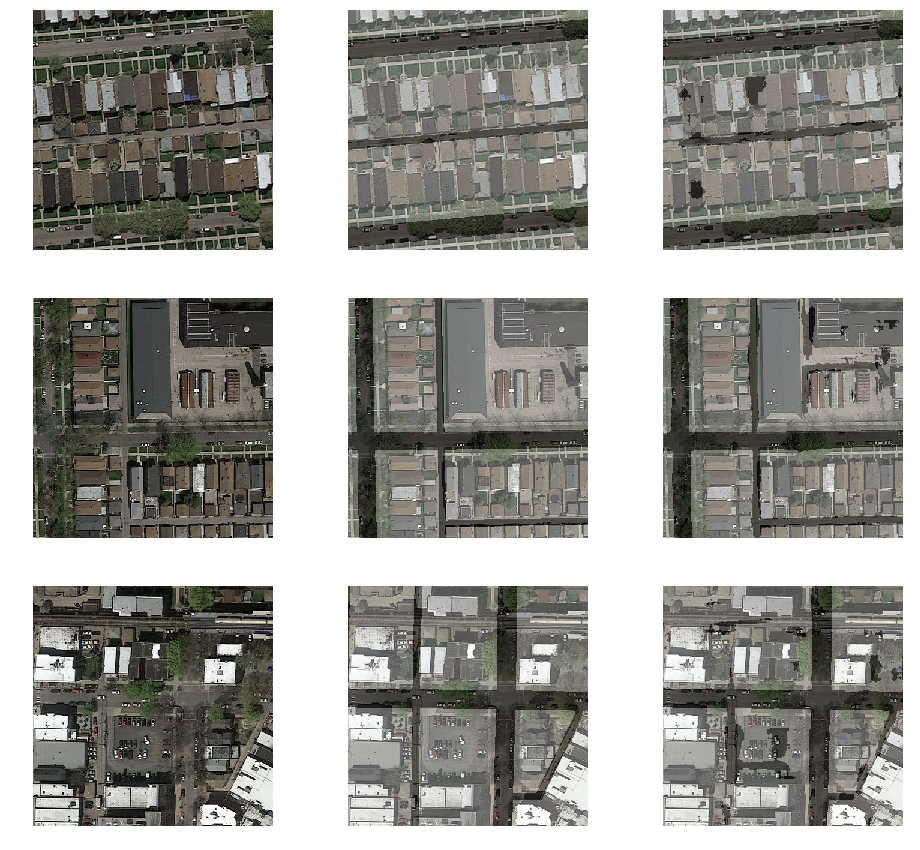

In [81]:
rs.display_predictions(y_pred_train, train_imgs, train_gt)






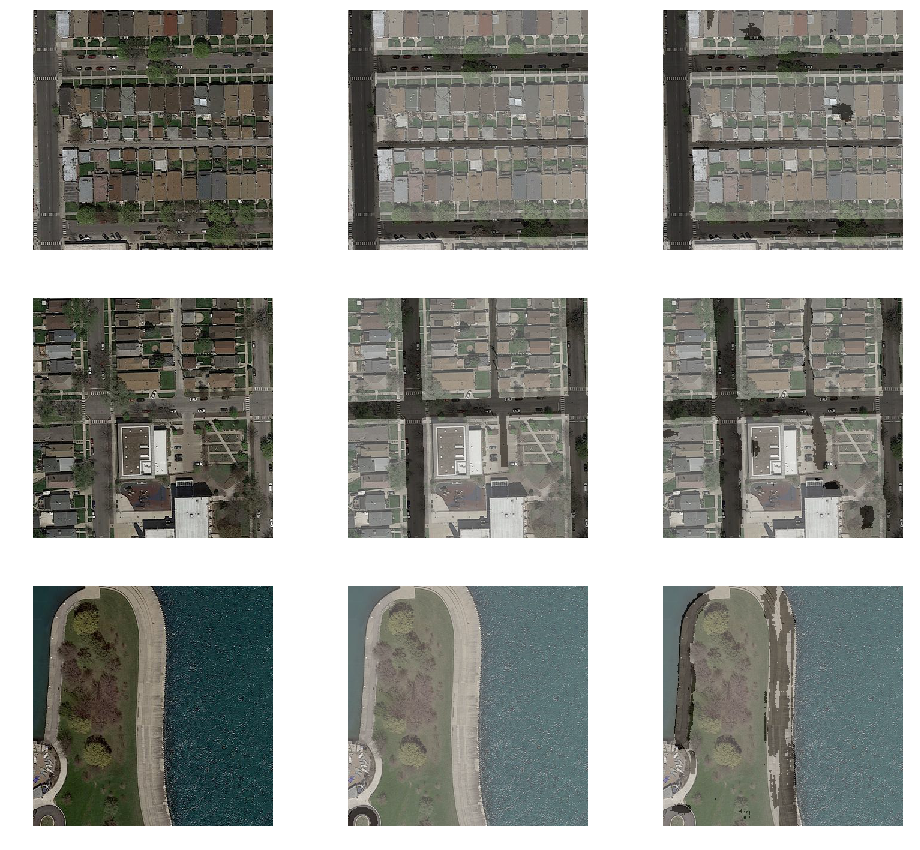

In [82]:

rs.display_predictions(y_pred_valid, val_imgs, val_gt)

# 3. Post Process

In [17]:
path_data = 'data'
path_train_dir = os.path.join(path_data, 'training')
path_test = os.path.join(path_data, 'test_set_images')
path_models = 'model'

test_img = rs.load_test_set(path_test)

test_img_canny = add_canny_layer_imgs(test_img, sigma=1.5) 

test_img_norm, _, _ = rs.normalize_data(test_img_canny, mode='all', mean_ref=mean_train, std_ref=std_train)

In [18]:
m = model.Model(display_log=False)
y_pred_test = m.apply_model(test_img_norm, 'model/2017_12_06_09h21_model.ckpt')

INFO:tensorflow:Restoring parameters from model/2017_12_06_09h21_model.ckpt


(50, 608, 608, 3)


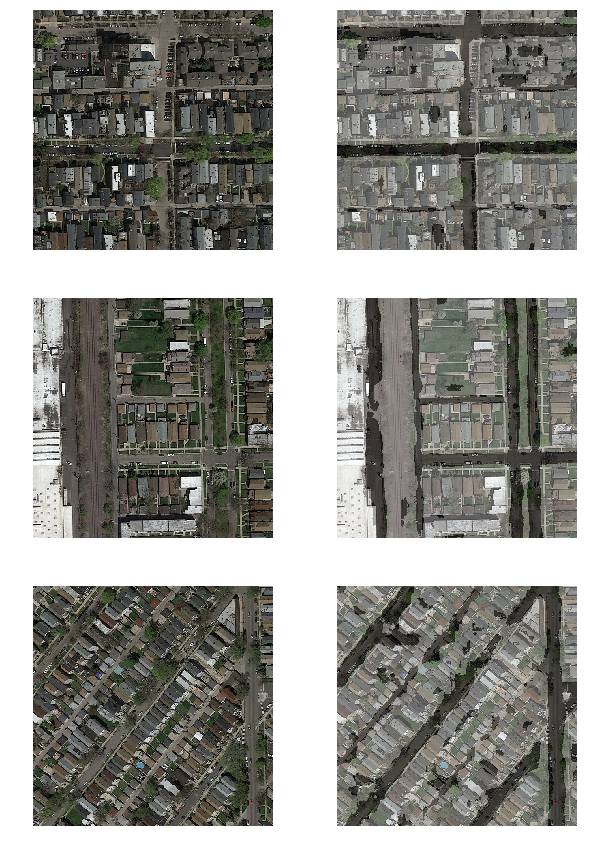

In [19]:
im_pred_test = np.reshape(y_pred_test, test_img.shape[:3]).astype(np.float32)
print(test_img.shape)
rs.display_predictions(y_pred_test, test_img)

/Users/patryk/anaconda/lib/python3.5/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


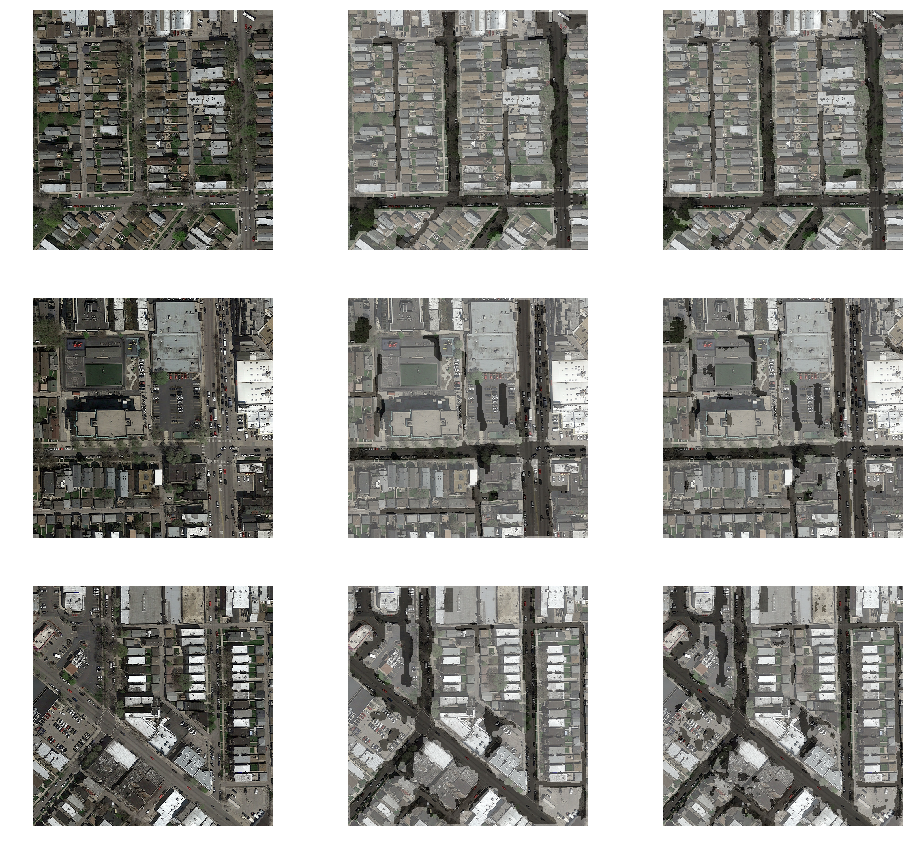

In [36]:
import skimage.measure
import skimage.draw
import skimage.morphology

def post_processing(imgs):
    imgs_post = np.zeros(imgs.shape)
    for i in range(imgs.shape[0]):
        imgs_post[i] = skimage.morphology.remove_small_objects(imgs[i].astype(bool), min_size = 1000)  
        imgs_post[i] = skimage.morphology.binary_closing(imgs_post[i].astype(bool), selem=np.ones([10,10]))
        imgs_post[i] = skimage.morphology.binary_opening(imgs_post[i].astype(bool), selem=np.ones([3,3]))
        imgs_post[i] = skimage.morphology.binary_closing(imgs_post[i].astype(bool), selem=np.ones([10,10]))
        imgs_post[i] = skimage.morphology.remove_small_objects(imgs_post[i].astype(bool), min_size = 1000)
    return imgs_post

im_pred_test_post = post_processing(im_pred_test)

rs.display_predictions(y_pred_test, test_img, im_pred_test_post)

# 4. Submission

In [37]:
rs.create_submission(im_pred_test_post, 'test_100epoch_aug_canny_posttest.csv')






